# The Happy Planet Index
This is the data for the Happy Planet Index 2016.

There are some similarities with the World Happiness Report.

In [1]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=8 # set options to display max number of rows

NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


In [5]:
!ls
#! head HappyPlanet16.csv

2015.csv
Chapter2OnlineData2019.textClipping
Equation6 Happy Planet Index.png
HappyPlanet.ipynb
HappyPlanet16.csv
LICENSE
Programming_for_Data_Analysis_Project2019.pdf
README.md
Simulation.ipynb
WHR.ipynb
data
etc
images
reports
whr_l16.ipynb
worldhappiness.ipynb


In [33]:
# Read in the selected rows and columns from the excel sheet
hpi = pd.read_excel('data/hpi-data-2016.xlsx', sheet_name='Complete HPI data', header=5, nrows=140, usecols='B:O')
hpi.head()

,HPI Rank,Country,Region,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita ($PPP),Population,GINI index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [34]:
hpi.columns

Index(['HPI Rank', 'Country', 'Region', 'Average Life \nExpectancy',
       'Average Wellbeing\n(0-10)', 'Happy Life Years',
       'Footprint\n(gha/capita)', 'Inequality of Outcomes',
       'Inequality-adjusted Life Expectancy', 'Inequality-adjusted Wellbeing',
       'Happy Planet Index', 'GDP/capita\n($PPP)', 'Population', 'GINI index'],
      dtype='object')

In [35]:
# write to a csv file
hpi.to_csv('HappyPlanet16.csv')

!ls

### Add column names:
The columns names need to be tidied up as they have spaces and line breaks included 

In [36]:
hpi_names=('HPI_Rank','Country','Region','Average_Life_Expectancy','Average_Wellbeing','Happy_Life_Years','Footprint','Inequality_of_Outcomes', 'IA_LifeExpectancy','IA_Wellbeing','HPI_Index','GDPpercapita','Population','GINI_Index')

In [37]:
# read in the csv file:
hpi = pd.read_csv('HappyPlanet16.csv', index_col=0, names=hpi_names, header=0)
hpi.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [38]:
hpi.columns

Index(['HPI_Rank', 'Country', 'Region', 'Average_Life_Expectancy',
       'Average_Wellbeing', 'Happy_Life_Years', 'Footprint',
       'Inequality_of_Outcomes', 'IA_LifeExpectancy', 'IA_Wellbeing',
       'HPI_Index', 'GDPpercapita', 'Population', 'GINI_Index'],
      dtype='object')

In [39]:
hpi_names=('HPI_Rank','Country','Region','Average_Life_Expectancy','Average_Wellbeing','Happy_Life_Years','Footprint','Inequality_of_Outcomes')

In [40]:
hpi.tail()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
135,29,Venezuela,Americas,73.885,7.1,41.494509,3.57,0.189280,65.453733,6.497572,33.569960,12771.595036,29854238,Data unavailable
136,5,Vietnam,Asia Pacific,75.477,5.5,32.770246,1.65,0.185921,64.794265,5.215639,40.307589,1754.547974,88809200,38.7
137,94,Yemen,Middle East and North Africa,63.340,4.1,15.204282,1.03,0.387313,44.721219,3.557846,22.754269,1289.034078,24882792,Data unavailable
138,77,Zambia,Sub Saharan Africa,58.409,5.0,16.674248,0.99,0.408122,38.674163,4.469524,25.224246,1686.618024,14786581,Data unavailable
139,99,Zimbabwe,Sub Saharan Africa,53.673,5.0,16.428627,1.37,0.366085,36.914005,4.608568,22.112535,850.827694,14565482,Data unavailable


In [41]:
hpi.dtypes

HPI_Rank                     int64
Country                     object
Region                      object
Average_Life_Expectancy    float64
                            ...   
HPI_Index                  float64
GDPpercapita               float64
Population                   int64
GINI_Index                  object
Length: 14, dtype: object

In [42]:
hpi.describe()

,HPI_Rank,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,1.400000e+02
mean,70.5000,70.925407,5.407835,30.248016,3.257543,0.232912,60.341523,4.972614,26.411113,13911.068748,4.800829e+07
std,40.5586,8.752559,1.148389,13.257900,2.303664,0.120883,14.880583,1.187299,7.317963,19746.184793,1.597180e+08
min,1.0000,48.910000,2.866667,8.970005,0.610000,0.043221,27.318494,2.420936,12.777156,244.196486,2.474980e+05
25%,35.7500,65.035750,4.575000,18.688270,1.425000,0.133526,48.211281,4.047168,21.206581,1628.064475,4.248207e+06
50%,70.5000,73.498000,5.250000,29.402414,2.680000,0.211742,63.406329,4.816266,26.290152,5691.063252,1.064617e+07
75%,105.2500,77.024500,6.225000,39.712583,4.482500,0.329324,72.574285,5.704285,31.541461,15159.065819,3.342601e+07
max,140.0000,83.572000,7.800000,59.315523,15.820000,0.507342,81.262817,7.624904,44.714071,105447.093241,1.350695e+09


### Print distribution plots of the actual variables

Average_Wellbeing
0      3.8
1      5.5
2      5.6
3      6.5
      ... 
136    5.5
137    4.1
138    5.0
139    5.0
Name: Average_Wellbeing, Length: 140, dtype: float64


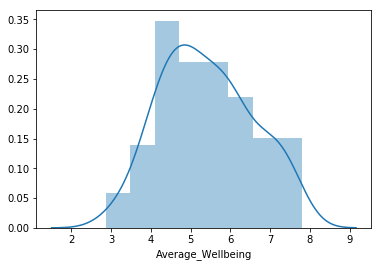

Happy_Life_Years
0      12.396024
1      34.414736
2      30.469461
3      40.166674
         ...    
136    32.770246
137    15.204282
138    16.674248
139    16.428627
Name: Happy_Life_Years, Length: 140, dtype: float64


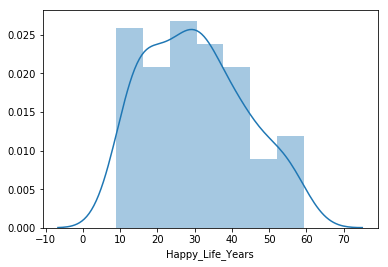

Footprint
0      0.79
1      2.21
2      2.12
3      3.14
       ... 
136    1.65
137    1.03
138    0.99
139    1.37
Name: Footprint, Length: 140, dtype: float64


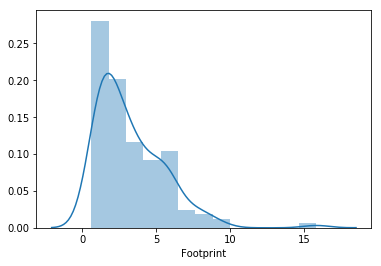

Inequality_of_Outcomes
0      0.426557
1      0.165134
2      0.244862
3      0.164238
         ...   
136    0.185921
137    0.387313
138    0.408122
139    0.366085
Name: Inequality_of_Outcomes, Length: 140, dtype: float64


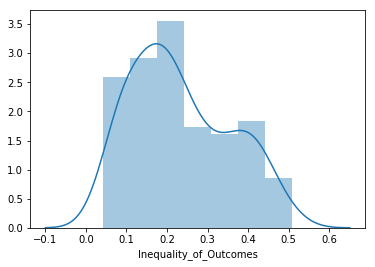

IA_LifeExpectancy
0      38.348818
1      69.671159
2      60.474545
3      68.349583
         ...    
136    64.794265
137    44.721219
138    38.674163
139    36.914005
Name: IA_LifeExpectancy, Length: 140, dtype: float64


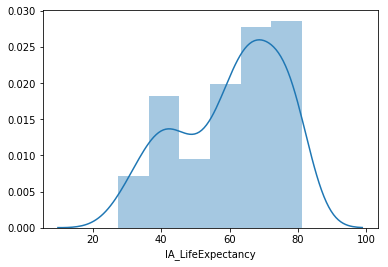

IA_Wellbeing
0      3.390494
1      5.097650
2      5.196449
3      6.034707
         ...   
136    5.215639
137    3.557846
138    4.469524
139    4.608568
Name: IA_Wellbeing, Length: 140, dtype: float64


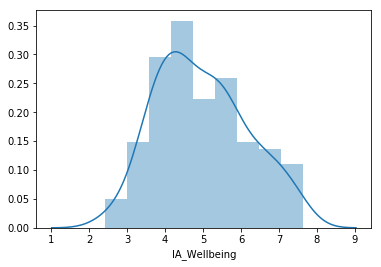

HPI_Index
0      20.225350
1      36.766874
2      33.300543
3      35.190244
         ...    
136    40.307589
137    22.754269
138    25.224246
139    22.112535
Name: HPI_Index, Length: 140, dtype: float64


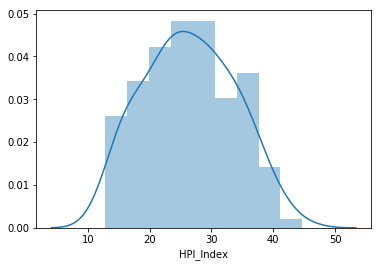

GDPpercapita
0        690.842629
1       4247.485437
2       5583.616160
3      14357.411589
           ...     
136     1754.547974
137     1289.034078
138     1686.618024
139      850.827694
Name: GDPpercapita, Length: 140, dtype: float64


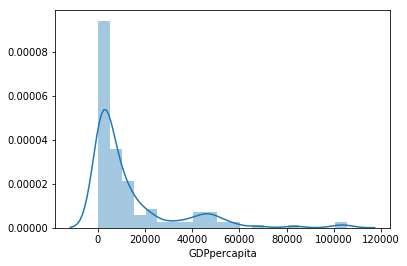

Population
0      29726803
1       2900489
2      37439427
3      42095224
         ...   
136    88809200
137    24882792
138    14786581
139    14565482
Name: Population, Length: 140, dtype: int64


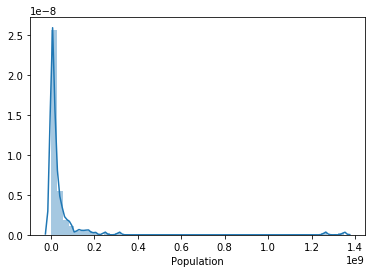

In [16]:
# exclude first 2 columns, select all rows
for i in hpi.iloc[:, 4:13]:
    # print the name of the column
    print(i)
    # print the column to see the values
    print(hpi[i])
    # plot a distogram
    sns.distplot(hpi[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()

In [17]:
hpi.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [18]:
!ls images

Equation6 HPI.png
Equation6 Happy Planet Index.textClipping
Mean anthropometric measurements 2.png
Mean anthropometric measurements.png


## The Happy Planet Index and how it is calculated

### Happy Planet Index (approximate)

The Happy Planet Index is calculated as outlined in the [Happy Planets Index Methods Paper]( http://happyplanetindex.org/about#how)

$ Happy Planet Index Approximate  = \frac{(Life Expectancy * Experienced Wellbeing) * Inequality Of Outcomes }{Ecological Footprint}$

There are some other calculations involved to get to this point as detailed in the Methods paper. These are actually included in the dataset so I could either simulate the variables and then do the adjustments or simulate the adjusted variables.

For now I will focus recreate this index after simulating the individual columns. The methods outlines 5 equations. Equation 6 is the final calculation of the Happy Planet Index

In [57]:
hpi.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


To calculate HPI scores begin by multiplying the mean life expectancy of residents of a given country by mean experienced wellbeing of residents in the same country which gives the number of inequality-adjusted Happy Life Years experienced by a typical resident in each country.

### Inequality-Adjusted life expectancy

#### Equation 2: Atkinson Index

I dont think I actually need this as can get to `Inequality of Outcomes` without it.

Atkinson Index for Life Expectancy:
$Atkinson Index Of Life Expectancy = 1 - \frac{Geometric Mean Of Life Expectancy}{Mean Life Expectancy}$

In [70]:
gmean(hpi.Average_Life_Expectancy)

70.34864409258057

In [68]:
from scipy.stats.mstats import gmean
Atkins=1-(gmean(hpi.Average_Life_Expectancy))/np.mean(hpi.Average_Life_Expectancy)
Atkins

0.008131966717016992

$Inequality Adjusted Life Expectancy = (1-Atkinson Index of Life Expectancy) × Mean Life Expectancy$


In [71]:
(1-Atkins)*hpi.Average_Life_Expectancy

0      59.182782
1      76.718017
2      73.708689
3      75.309564
         ...    
136    74.863224
137    62.824921
138    57.934020
139    53.236533
Name: Average_Life_Expectancy, Length: 140, dtype: float64

### Inequality of Outcomes
Working out the calculations for the Inequality_Of_Outcomes.  
This part is working out to be equal to the `Inequality_of_Outcomes` column

In [55]:
1-((hpi.IA_LifeExpectancy*hpi.IA_Wellbeing)/(hpi.Average_Life_Expectancy*hpi.Average_Wellbeing))

0      0.426557
1      0.165134
2      0.244862
3      0.164238
         ...   
136    0.185921
137    0.387313
138    0.408122
139    0.366085
Length: 140, dtype: float64

### Inequality-adjusted life expectancy.    
This is provided as a column. It looks like it is derived from the`Average_Life_Expectancy`
Inequality-adjusted life expectancy = (1-Atkinson Index of life expectancy) × Mean life expectancy

In [72]:
(1-Atkins)*hpi.Average_Life_Expectancy

0      59.182782
1      76.718017
2      73.708689
3      75.309564
         ...    
136    74.863224
137    62.824921
138    57.934020
139    53.236533
Name: Average_Life_Expectancy, Length: 140, dtype: float64

In [63]:
hpi.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index,Atkinson
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable,0.008132
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96,0.008132
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable,0.008132
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49,0.008132
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48,0.008132


In [52]:
(hpi.Average_Life_Expectancy*hpi.Average_Wellbeing)

0      226.7384
1      425.4085
2      416.1528
3      493.5255
         ...   
136    415.1235
137    259.6940
138    292.0450
139    268.3650
Length: 140, dtype: float64

In [51]:
((hpi.Average_Life_Expectancy*hpi.Average_Wellbeing)*hpi.Inequality_of_Outcomes/100)/hpi.Footprint

0      1.224265
1      0.317870
2      0.480660
3      0.258139
         ...   
136    0.467758
137    0.976532
138    1.203938
139    0.717112
Length: 140, dtype: float64


<img src="images/Equation6 HPI.png" height="150" alt="Equation 6" />

### Working out the happy planet index based on the methods paper

To calculate HPI scores, begin by multiplying the mean life expectancy of residents of a given country by mean experienced wellbeing of residents in the same country... to get the number of inequality-adjusted Happy Life Years experienced by a typical resident in each country


$Happy Planet Index_IA = Φ × ((Experienced WellbeingIA - α × Life expectancyIA) + 𝜋) (Ecological Footprint + β)
where: IA = inequality adjusted, 𝛼 = 0.158, 𝛽 = 2.067, 𝜋 = 3.951, Φ = 0.452$


Essentially I need to calculate the HPI_Index. It is included in the dataset. 

### Equation 1


$Happy Planet Index ≈ ( Life Expectancy x Experienced Wellbeing) x Inequality Of Outcomes Ecological Footprint$


In [19]:
phi=0.452
alpha=0.158
Beta= 2.067
pi=3.951


In [29]:
(phi*((alpha*hpi.IA_LifeExpectancy)+pi))/(hpi.Footprint+Beta)

0      1.583679
1      1.580895
2      1.458013
3      1.280412
         ...   
136    1.725370
137    1.607899
138    1.487670
139    1.286617
Length: 140, dtype: float64

In [ ]:
hpi

In [20]:
hpi['calc']= phi*((hpi.IA_Wellbeing - (alpha* hpi.IA_LifeExpectancy) + pi))/ (hpi.Footprint+ Beta)

In [21]:
hpi.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index,calc
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable,0.202883
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96,-0.207072
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable,-0.043994
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49,-0.070619
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48,-0.302471


In [31]:
hpi.sort_values('HPI_Index', ascending=False)

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index,calc
28,1,Costa Rica,Americas,79.076,7.300000,48.174792,2.84000,0.145568,72.615551,6.792280,44.714071,9733.396931,4654148,48.61,-0.067241
79,2,Mexico,Americas,76.411,7.300000,44.262083,2.89000,0.187699,66.311965,6.832881,40.697292,9703.371017,122070963,48.07,0.027956
26,3,Colombia,Americas,73.673,6.400000,35.070893,1.87000,0.235044,63.100669,5.715982,40.695011,7885.061292,46881018,53.54,-0.034778
134,4,Vanuatu,Asia Pacific,71.341,6.470000,34.895752,1.86262,0.223332,60.321329,5.943032,40.570099,3158.420974,247498,Data unavailable,0.041784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,137,Benin,Sub Saharan Africa,59.167,3.200000,9.935781,1.41000,0.444113,37.269799,2.823961,13.422365,807.688451,10049792,Data unavailable,0.115221
123,138,Togo,Sub Saharan Africa,58.601,2.866667,8.970005,1.13000,0.428742,39.639758,2.420936,13.233269,580.495062,6745581,Data unavailable,0.015390
72,139,Luxembourg,Europe,81.111,7.000000,51.677888,15.82000,0.067837,78.970294,6.702020,13.151174,105447.093241,530946,34.79,-0.046099
23,140,Chad,Sub Saharan Africa,50.808,4.000000,9.580599,1.46000,0.507342,27.318494,3.665056,12.777156,972.679345,12715465,Data unavailable,0.422875


In [77]:
hpi.dtypes

HPI_Rank                     int64
Country                     object
Region                      object
Average_Life_Expectancy    float64
                            ...   
GDPpercapita               float64
Population                   int64
GINI_Index                  object
Atkinson                   float64
Length: 15, dtype: object

In [79]:
hpi.describe()

,HPI_Rank,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,Atkinson
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,1.400000e+02,140.000000
mean,70.5000,70.925407,5.407835,30.248016,3.257543,0.232912,60.341523,4.972614,26.411113,13911.068748,4.800829e+07,0.008132
std,40.5586,8.752559,1.148389,13.257900,2.303664,0.120883,14.880583,1.187299,7.317963,19746.184793,1.597180e+08,0.000000
min,1.0000,48.910000,2.866667,8.970005,0.610000,0.043221,27.318494,2.420936,12.777156,244.196486,2.474980e+05,0.008132
25%,35.7500,65.035750,4.575000,18.688270,1.425000,0.133526,48.211281,4.047168,21.206581,1628.064475,4.248207e+06,0.008132
50%,70.5000,73.498000,5.250000,29.402414,2.680000,0.211742,63.406329,4.816266,26.290152,5691.063252,1.064617e+07,0.008132
75%,105.2500,77.024500,6.225000,39.712583,4.482500,0.329324,72.574285,5.704285,31.541461,15159.065819,3.342601e+07,0.008132
max,140.0000,83.572000,7.800000,59.315523,15.820000,0.507342,81.262817,7.624904,44.714071,105447.093241,1.350695e+09,0.008132


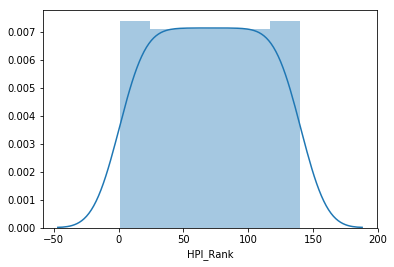

In [82]:
# plot the distribution of the actual HPI_Rank
sns.distplot(hpi.HPI_Rank);


In [67]:
hpi.Average_Life_Expectancy.describe()

count    140.000000
mean      70.925407
std        8.752559
min       48.910000
25%       65.035750
50%       73.498000
75%       77.024500
max       83.572000
Name: Average_Life_Expectancy, dtype: float64

#### Life Expectancy:
I think the Inequality Adjusted Average Life Expectancy will follow the same pattern but has been rescaled by the Atkinson index

In [85]:
hpi.Average_Life_Expectancy.isna().sum()

0

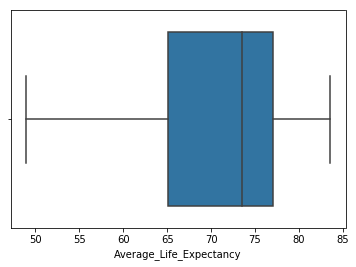

In [86]:
sns.boxplot(hpi.Average_Life_Expectancy)

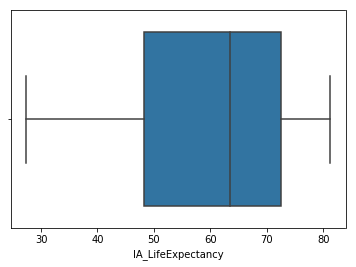

In [90]:
sns.boxplot(hpi.IA_LifeExpectancy)

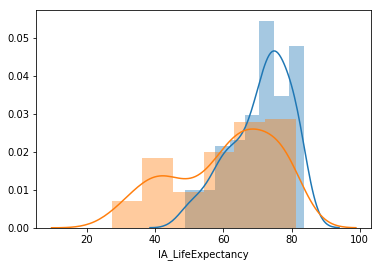

In [89]:
sns.distplot(hpi.Average_Life_Expectancy)
sns.distplot(hpi.IA_LifeExpectancy)

### Well being

In [106]:
hpi.head(10)

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index,Atkinson
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable,0.008132
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96,0.008132
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable,0.008132
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49,0.008132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,43,Austria,Europe,81.004,7.4,54.436230,6.06,0.071294,78.022786,7.135020,30.478224,48324.254037,8429991,30.48,0.008132
7,8,Bangladesh,Asia Pacific,70.843,4.7,23.289482,0.72,0.273657,56.624649,4.271013,38.390694,858.933363,155257387,Data unavailable,0.008132
8,102,Belarus,Post-communist,70.874,5.7,34.014327,5.09,0.131910,66.744852,5.254227,21.718916,6721.834908,9464000,26.01,0.008132
9,87,Belgium,Europe,80.429,6.9,49.537808,7.44,0.085373,77.210747,6.573976,23.726523,44731.219479,11128246,27.59,0.008132


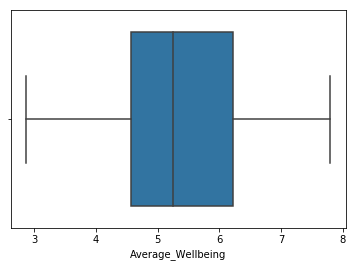

In [93]:
sns.boxplot(hpi.Average_Wellbeing);

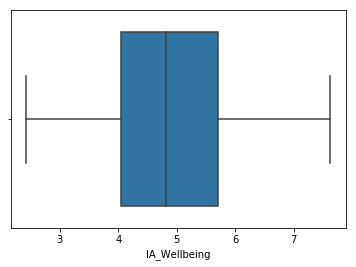

In [94]:
sns.boxplot(hpi.IA_Wellbeing);

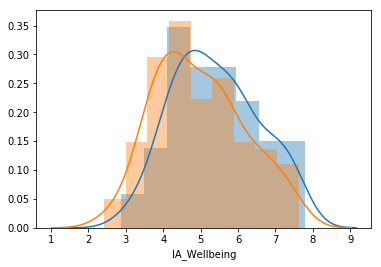

In [96]:
sns.distplot(hpi.Average_Wellbeing)
sns.distplot(hpi.IA_Wellbeing);

### GDP per capita
- <https://gist.github.com/jkclem/d2f522c4131910264f7e1e732d7cc3af>  
- <https://towardsdatascience.com/modeling-gdp-per-capita-and-life-expectancy-a6a34a5dd84>  
As it is and using a log scale 

Look at a Pareto distribution

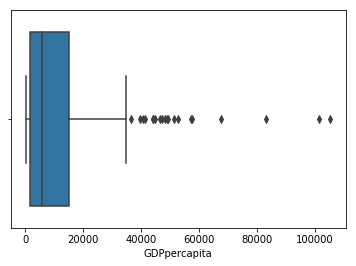

In [102]:
sns.boxplot(hpi.GDPpercapita)

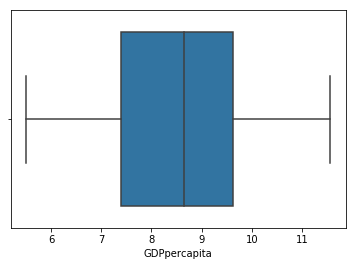

In [99]:
sns.boxplot(np.log(hpi.GDPpercapita));


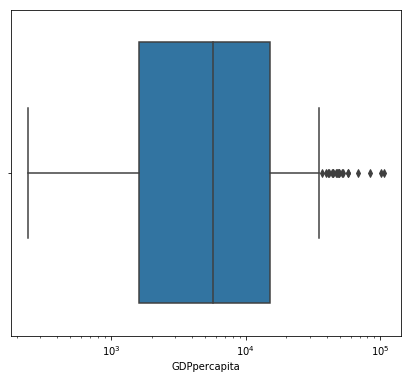

In [104]:
# # Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")
sns.boxplot(hpi.GDPpercapita)

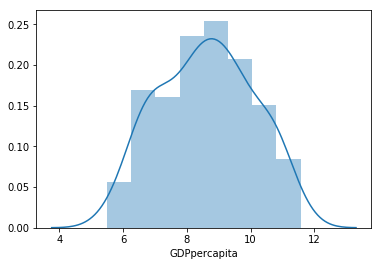

In [100]:
sns.distplot(np.log(hpi.GDPpercapita));

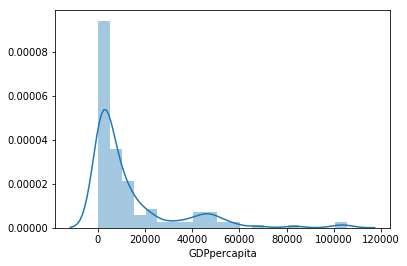

In [101]:
sns.distplot(hpi.GDPpercapita);

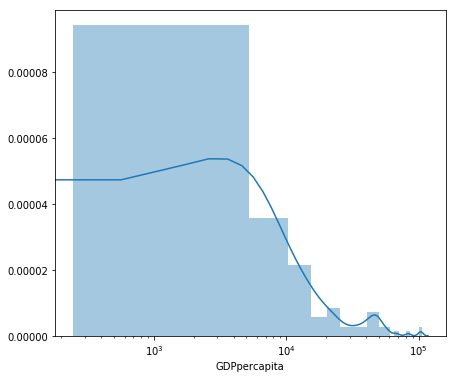

In [105]:
# # Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")
sns.distplot(hpi.GDPpercapita)